###Методические указания

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
x = pd.read_csv("0_x.csv")

In [ ]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [ ]:
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

In [ ]:
x.shape, y.shape

((387, 5), (387, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
binary = LinearRegression()

In [ ]:
binary.fit(x[[1]], y)

In [ ]:
binary.coef_

array([[95.52010745]])

In [ ]:
binary.predict(x[[1]])

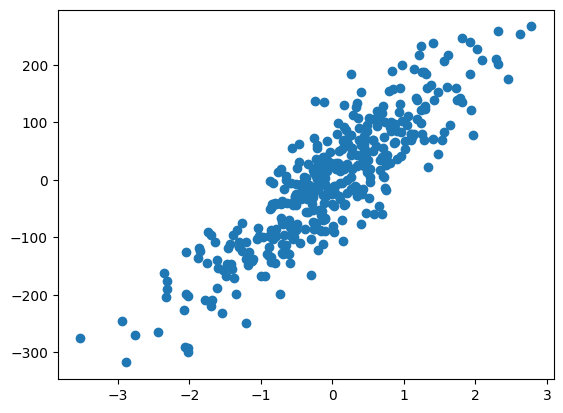

In [ ]:
plt.scatter(x[1], y)

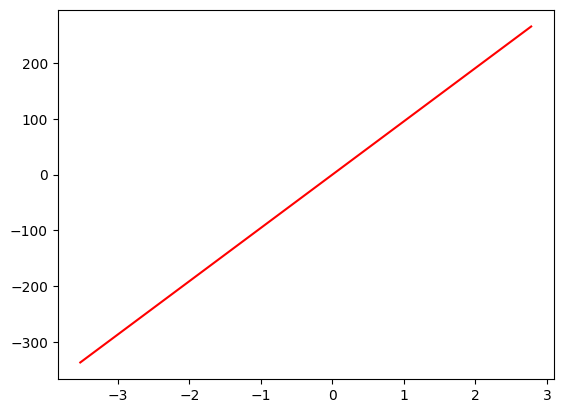

In [ ]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [ ]:
reg.score(X, Y)

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

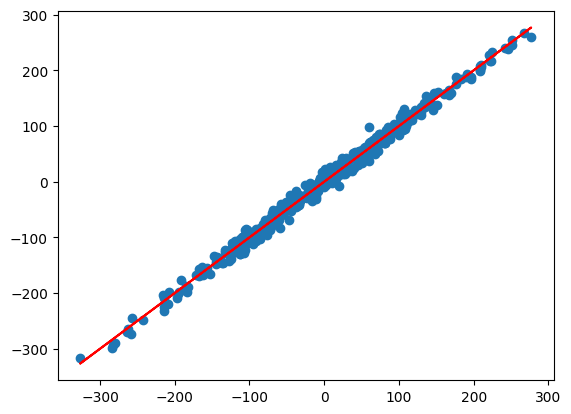

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

###Задания для самостоятельного выполнения

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

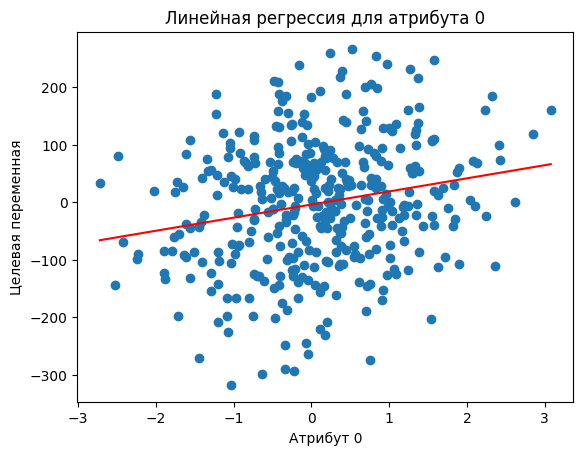

R2-score (коэф. детерминации) для атрибута 0: 0.04364336234689348


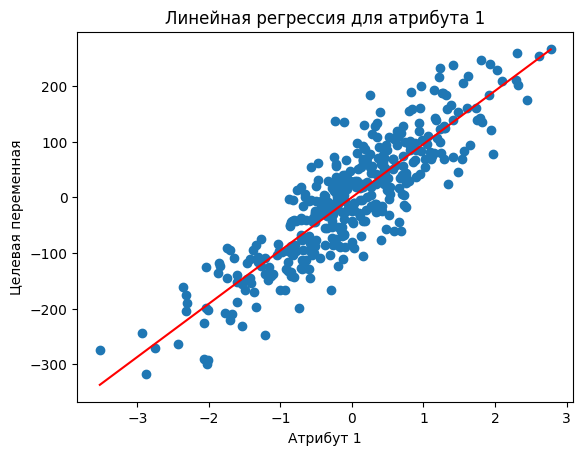

R2-score (коэф. детерминации) для атрибута 1: 0.7699743283650629


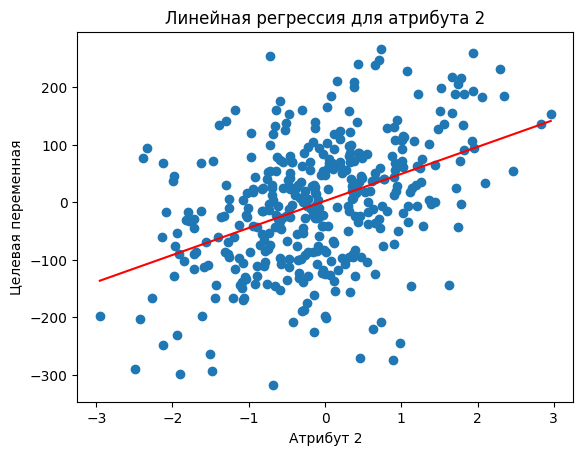

R2-score (коэф. детерминации) для атрибута 2: 0.18794528514998887


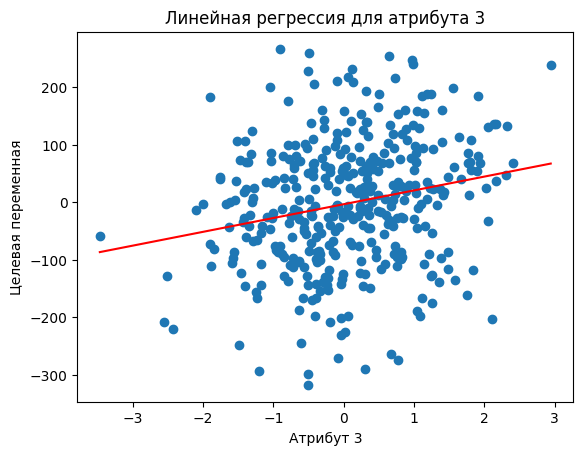

R2-score (коэф. детерминации) для атрибута 3: 0.047470345664983093


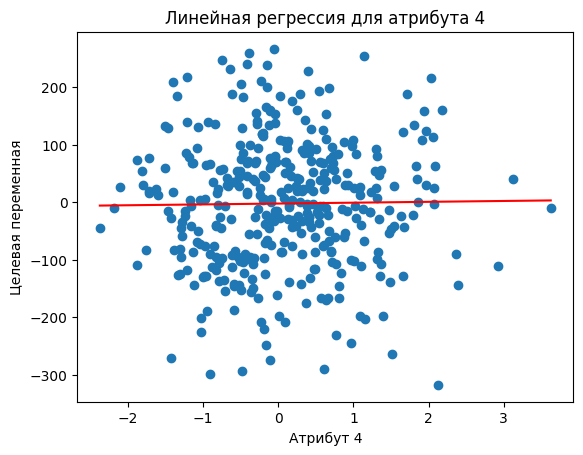

R2-score (коэф. детерминации) для атрибута 4: 0.00017176151145947838


In [ ]:
for col in range(x.shape[1]):
    attribute = x[[col]]
    binary.fit(attribute, y)
    r2_score = binary.score(attribute, y)

    xx = np.linspace(attribute.min(), attribute.max(), 100).reshape((-1, 1))
    plt.scatter(attribute, y)
    plt.plot(xx, binary.predict(xx), c='r')
    plt.xlabel(f"Атрибут {col}")
    plt.ylabel("Целевая переменная")
    plt.title(f"Линейная регрессия для атрибута {col}")
    plt.show()

    print(f"R2-score (коэф. детерминации) для атрибута {col}: {r2_score}")

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=1.0, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values

        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > prev_err:
                alpha /= 2
                print(f"Уменьшение скорости обучения до {alpha}")
                self.b0 = 0
                self.b1 = 0
                prev_err = self.error(X, Y)
                continue

            if abs(prev_err - new_err) < accuracy:
                print("Достигнута заданная точность.")
                break

            prev_err = new_err

        else:
            print("Достигнуто максимальное количество шагов.")
        return steps, errors

    def plot(self, X, Y):
        plt.figure()
        plt.scatter(X, Y, label="Исходные данные")
        X_min, X_max = min(X), max(X)
        Y_min = self.predict(X_min)
        Y_max = self.predict(X_max)
        plt.plot([X_min, X_max], [Y_min, Y_max], 'r', label="Регрессионная линия")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()


Достигнута заданная точность.
Ошибка после градиентного спуска: 96.5


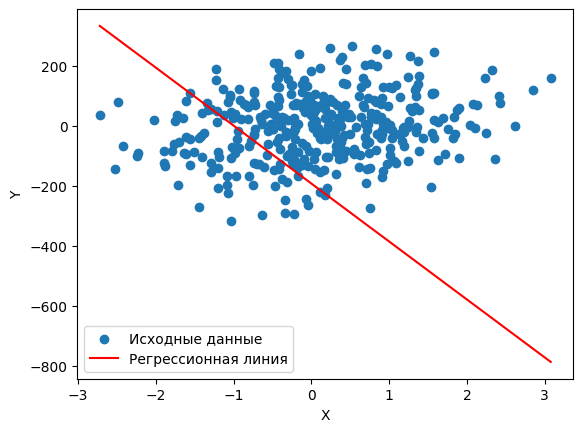

In [ ]:
hyp = Model()

steps, errors = hyp.fit(x[0], y[0])  # Передаем первый столбец y
J = hyp.error(x, y[0])
print("Ошибка после градиентного спуска:", J)

hyp.plot(x[0], y[0])

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

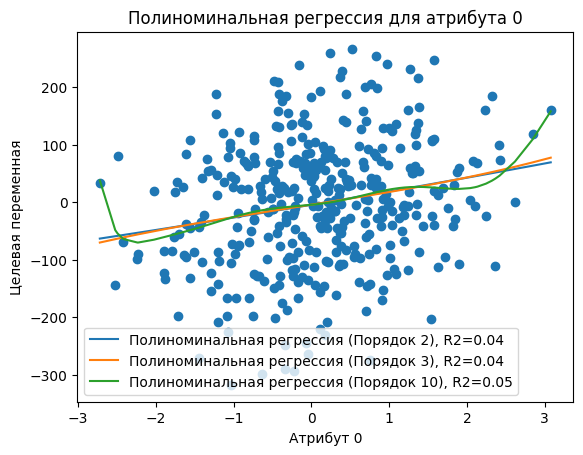

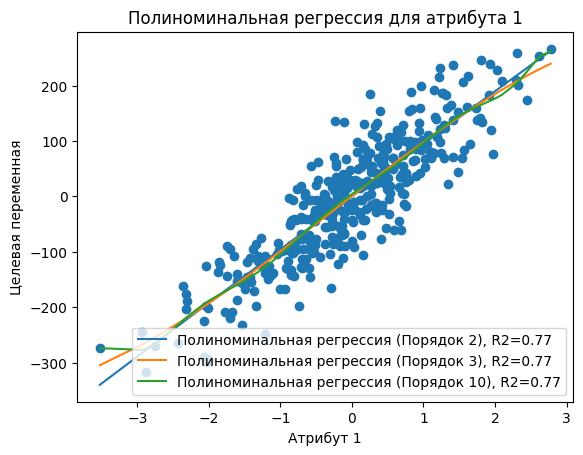

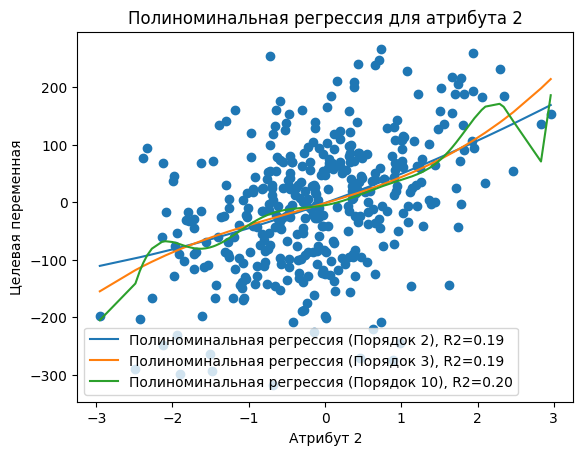

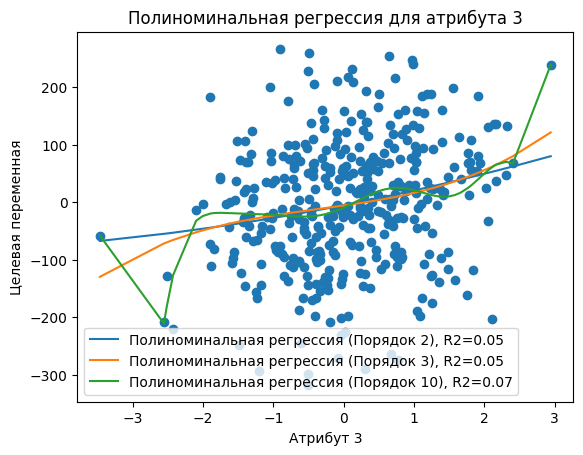

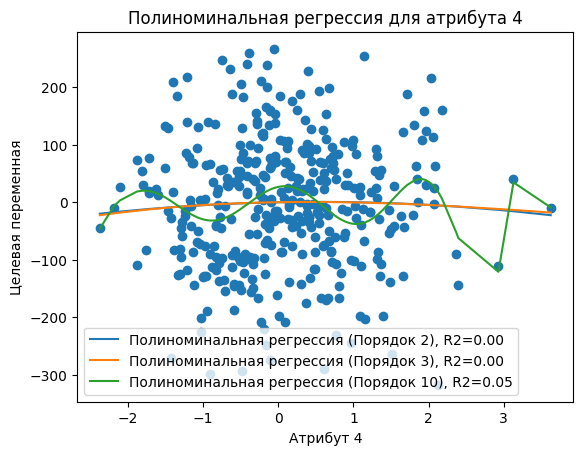

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Порядки полиномиальных регрессий
orders = [2, 3, 10]


linear_reg = LinearRegression()


for col in range(x.shape[1]):
    attribute = x[[col]]
    plt.scatter(attribute, y)

    for order in orders:
        poly = PolynomialFeatures(degree=order)
        x_poly = poly.fit_transform(attribute)

        linear_reg.fit(x_poly, y)
        y_pred = linear_reg.predict(x_poly)

        r2 = r2_score(y, y_pred)
        label = f"Полиноминальная регрессия (Порядок {order}), R2={r2:.2f}"

        # Сортировка данных перед построением графика
        sort_axis = np.argsort(attribute.values.ravel())
        attribute_sorted = attribute.values.ravel()[sort_axis]
        y_pred_sorted = y_pred[sort_axis]

        plt.plot(attribute_sorted, y_pred_sorted, label=label)

    plt.xlabel(f"Атрибут {col}")
    plt.ylabel("Целевая переменная")
    plt.title(f"Полиноминальная регрессия для атрибута {col}")
    plt.legend()
    plt.show()


4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
linear_reg = LinearRegression()

orders = [1, 2, 3, 10]

results = pd.DataFrame(columns=["Модель", "R2"])

for col in range(x.shape[1]):
    attribute = x[[col]]

    linear_reg.fit(attribute, y)
    r2_linear = r2_score(y, linear_reg.predict(attribute))
    results = pd.concat([results, pd.DataFrame({"Модель": [f"Линейная регрессия для атрибута {col}"], "R2": [r2_linear]})], ignore_index=True)

    for order in orders:
        poly = PolynomialFeatures(degree=order)
        x_poly = poly.fit_transform(attribute)

        linear_reg.fit(x_poly, y)
        r2_poly = r2_score(y, linear_reg.predict(x_poly))
        results = pd.concat([results, pd.DataFrame({"Модель": [f"Полиномиальная регрессия (Порядок {order}) для атрибута {col}"], "R2": [r2_poly]})], ignore_index=True)

print(results)


                         Модель                           R2   
0                   Линейная регрессия для атрибута 0  0.043643
1   Полиномиальная регрессия (Порядок 1) для атриб...  0.043643
2   Полиномиальная регрессия (Порядок 2) для атриб...  0.043672
3   Полиномиальная регрессия (Порядок 3) для атриб...  0.043765
4   Полиномиальная регрессия (Порядок 10) для атри...  0.050356
5                   Линейная регрессия для атрибута 1  0.769974
6   Полиномиальная регрессия (Порядок 1) для атриб...  0.769974
7   Полиномиальная регрессия (Порядок 2) для атриб...  0.769994
8   Полиномиальная регрессия (Порядок 3) для атриб...  0.771118
9   Полиномиальная регрессия (Порядок 10) для атри...  0.772677
10                  Линейная регрессия для атрибута 2  0.187945
11  Полиномиальная регрессия (Порядок 1) для атриб...  0.187945
12  Полиномиальная регрессия (Порядок 2) для атриб...  0.190008
13  Полиномиальная регрессия (Порядок 3) для атриб...  0.192802
14  Полиномиальная регрессия (Порядок 10

5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg = LinearRegression()

linear_reg.fit(x, y)

y_pred = linear_reg.predict(x)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 7.78
MSE: 93.49
RMSE: 9.67
R2: 0.99


6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [ ]:
import time

linear_reg = LinearRegression()

polynomial_degrees = [1, 2, 3, 4, 5]

poly = PolynomialFeatures(degree=1)

for degree in polynomial_degrees:
    start_time = time.time()
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)  # Генерируем полиномиальные признаки
    linear_reg.fit(x_poly, y)  # Обучение модели
    end_time = time.time()  # Засекаем конечное время
    elapsed_time = end_time - start_time
    print(f"Время обучения для полинома степени {degree}: {elapsed_time:.4f} сек.")



Время обучения для полинома степени 1: 0.0157 сек.
Время обучения для полинома степени 2: 0.0074 сек.
Время обучения для полинома степени 3: 0.0155 сек.
Время обучения для полинома степени 4: 0.0342 сек.
Время обучения для полинома степени 5: 0.0552 сек.


In [ ]:
polynomial_degrees = [1, 2, 3, 4, 5]

poly = PolynomialFeatures(degree=2)

for degree in polynomial_degrees:
    start_time = time.time()
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)  # Генерируем полиномиальные признаки
    linear_reg.fit(x_poly, y)  # Обучение модели
    end_time = time.time()  # Засекаем конечное время
    elapsed_time = end_time - start_time
    print(f"Время обучения для полинома степени {degree}: {elapsed_time:.4f} сек.")


Время обучения для полинома степени 1: 0.0175 сек.
Время обучения для полинома степени 2: 0.0075 сек.
Время обучения для полинома степени 3: 0.0147 сек.
Время обучения для полинома степени 4: 0.0318 сек.
Время обучения для полинома степени 5: 0.0559 сек.


In [ ]:
polynomial_degrees = [1, 2, 3, 4, 5]

poly = PolynomialFeatures(degree=3)

for degree in polynomial_degrees:
    start_time = time.time()
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)  # Генерируем полиномиальные признаки
    linear_reg.fit(x_poly, y)  # Обучение модели
    end_time = time.time()  # Засекаем конечное время
    elapsed_time = end_time - start_time
    print(f"Время обучения для полинома степени {degree}: {elapsed_time:.4f} сек.")



Время обучения для полинома степени 1: 0.0200 сек.
Время обучения для полинома степени 2: 0.0073 сек.
Время обучения для полинома степени 3: 0.0146 сек.
Время обучения для полинома степени 4: 0.0319 сек.
Время обучения для полинома степени 5: 0.0565 сек.


###Дополнительные задания

1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [ ]:
linear_reg = LinearRegression()

polynomial_degrees = [2, 3, 10]

poly = PolynomialFeatures(degree=1)

results = []

for col in x.columns:
    feature = x[[col]]

    for degree in polynomial_degrees:
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(feature)

        linear_reg.fit(x_poly, y)

        y_pred = linear_reg.predict(x_poly)

        r2 = r2_score(y, y_pred)

        results.append({
            "Признак": col,
            "Порядок полинома": degree,
            "R2": r2
        })


results_df = pd.DataFrame(results)
print(results_df)

    Признак  Порядок полинома     R2   
0      0             2         0.043672
1      0             3         0.043765
2      0            10         0.050356
3      1             2         0.769994
4      1             3         0.771118
5      1            10         0.772677
6      2             2         0.190008
7      2             3         0.192802
8      2            10         0.204409
9      3             2         0.047943
10     3             3         0.050312
11     3            10         0.072667
12     4             2         0.001049
13     4             3         0.001065
14     4            10         0.045053
